# Long x Short de Bancos

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import datetime

%matplotlib inline

datasource = 'yahoo'

today = datetime.date.today()

last_year = today.replace(year=today.year - 1)
last_week = today.replace(day=today.day - 7)

bancos = ['BBDC4.SA', 'BBDC3.SA', 'ITUB4.SA', 'ITUB3.SA', 'BBAS3.SA', 'SANB3.SA', 'SANB11.SA', 'SANB4.SA', 'ITSA3.SA', 'ITSA4.SA']

In [64]:
def correlacao(periodo):
    prices = pd.DataFrame()
    for b in bancos:
        prices[b] = web.DataReader(b, datasource, periodo)['Adj Close']

    log_returns = np.log(prices / prices.shift(1))

    return log_returns.corr()

In [65]:
def heatmap(correlacao):
    sns.set()

    f, ax = plt.subplots(figsize=(17, 5))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.9,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Correlação do ano

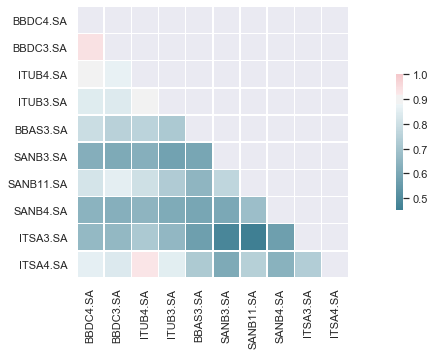

In [66]:
correlacao_ano = correlacao(last_year)
heatmap(correlacao_ano)

## Correlação da Semana

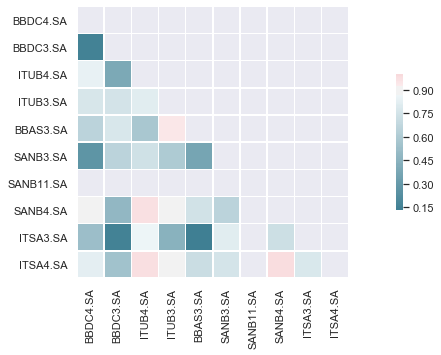

In [59]:
correlacao_semana = correlacao(last_week)
heatmap(correlacao_semana)

In [61]:
# 0.939377
correlacao_semana

,BBDC4.SA,BBDC3.SA,ITUB4.SA,ITUB3.SA,BBAS3.SA,SANB3.SA,SANB11.SA,SANB4.SA,ITSA3.SA,ITSA4.SA
BBDC4.SA,1.000000,0.159236,0.838802,0.769228,0.659765,0.269657,NaN,0.899284,0.526950,0.827132
BBDC3.SA,0.159236,1.000000,0.391019,0.753307,0.779447,0.656792,NaN,0.482497,0.156337,0.546804
ITUB4.SA,0.838802,0.391019,1.000000,0.810937,0.581882,0.739751,NaN,0.973223,0.865803,0.981670
ITUB3.SA,0.769228,0.753307,0.810937,1.000000,0.944600,0.603311,NaN,0.910836,0.450586,0.904194
BBAS3.SA,0.659765,0.779447,0.581882,0.944600,1.000000,0.372380,NaN,0.743375,0.132608,0.716143
SANB3.SA,0.269657,0.656792,0.739751,0.603311,0.372380,1.000000,NaN,0.655095,0.810309,0.758684
SANB11.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SANB4.SA,0.899284,0.482497,0.973223,0.910836,0.743375,0.655095,NaN,1.000000,0.728130,0.989205
ITSA3.SA,0.526950,0.156337,0.865803,0.450586,0.132608,0.810309,NaN,0.728130,1.000000,0.782461
ITSA4.SA,0.827132,0.546804,0.981670,0.904194,0.716143,0.758684,NaN,0.989205,0.782461,1.000000
